# 2440016804 - Rio Pramana - LA01 - Final Exam - Nomor 1

#### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import scipy

In [2]:
# Importing the dataset, downloaded file is in the same folder
csv_path = "knn_datasets.csv"
knn_df = pd.read_csv(csv_path)

## 1a. Preprocessing data

### Run a quick check on the dataset

In [3]:
knn_df.shape

(480, 9)

In [4]:
knn_df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,3,126,88.0,41,235,39.3,0.704,27,0
1,8,99,84.0,0,0,35.4,0.388,50,0
2,7,196,90.0,0,0,39.8,0.451,41,1
3,9,119,80.0,35,0,29.0,0.263,29,1
4,11,143,94.0,33,146,36.6,0.254,51,1


In [5]:
knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      480 non-null    int64  
 1   X2      480 non-null    int64  
 2   X3      479 non-null    float64
 3   X4      480 non-null    int64  
 4   X5      480 non-null    int64  
 5   X6      480 non-null    float64
 6   X7      480 non-null    float64
 7   X8      480 non-null    int64  
 8   X9      480 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 33.9 KB


### Check for missing data

In [6]:
knn_df.isnull().sum()

X1    0
X2    0
X3    1
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

There is 1 (one) missing data on X3 variable

### Filling Missing Data

X3 has a data type of float64. The possible values for this variable is infinite, thus making it a continuous variable. Therefore, I will fill the missing value on X3 using the mean of the column's values

In [7]:
#Check row in which the value of X3 is null
knn_df[knn_df.isnull().any(axis=1)]

,X1,X2,X3,X4,X5,X6,X7,X8,X9
17,9,102,NaN,37,0,32.9,0.665,46,1


In [8]:
knn_df["X3"] = knn_df["X3"].fillna(knn_df["X3"].mean()) #Replace the missing value

In [9]:
#Recheck the row
knn_df.loc[[17]]

,X1,X2,X3,X4,X5,X6,X7,X8,X9
17,9,102,69.033403,37,0,32.9,0.665,46,1


In [10]:
#Recheck the number of missing data in knn_df
knn_df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

As we can see, the missing data has been replaced with X3's mean thus we have no more missing data

#### Check Data Summarization

In [11]:
knn_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,3.779167,121.087500,69.033403,20.714583,79.135417,32.022083,0.485019,32.916667,0.352083
std,3.335327,32.312033,19.080396,15.632784,114.186313,8.145896,0.337495,11.606336,0.478118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.075000,0.254000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,122.750000,36.600000,0.645500,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000,1.000000


## 1b. Feature Selection (attributes with high correlation with X9)

For feature selection, we will select attributes that have high correlation with X9. We will use correlation coefficients to do this

#### Displaying correlation matrix

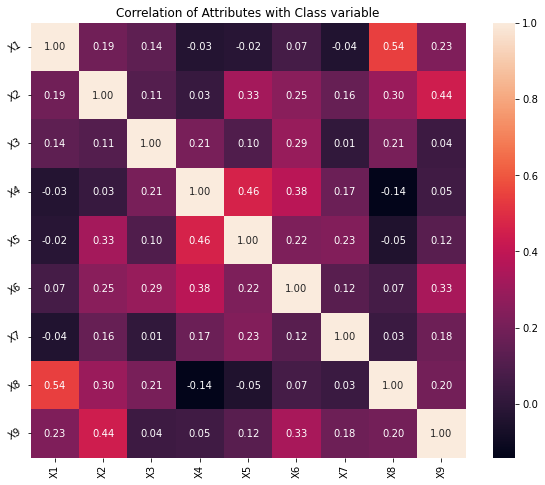

In [12]:
correlation = knn_df.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [13]:
#Displaying correlation coefficients from highest to lowest
correlation["X9"].sort_values(ascending=False)

X9    1.000000
X2    0.442458
X6    0.333234
X1    0.226904
X8    0.195662
X7    0.177169
X5    0.119389
X4    0.051739
X3    0.043569
Name: X9, dtype: float64

As we can see from the results above, the highest correlation coefficient is 0.44 (X2) and the lowest correlation coefficient is 0.04 (X3). Note that X9 is the target variable so it will have a correlation coefficient of 1 so we will not consider this particular coefficient/variable for features.

To select the features, I will set the threshold to be 0.2 (I consider that correlation coefficient > 0.2 is high enough in this case), so every feature that has correlation coefficient > 0.2 will be selected for this KNN algorithm. These features are X2, X6, and X1

#### Select Features Code

In [14]:
cor_target = abs(correlation["X9"])
high_corr = cor_target[cor_target >= 0.2] #Selecting variables with coefficient > 0.2
high_corr.index

Index(['X1', 'X2', 'X6', 'X9'], dtype='object')

In [15]:
#Instead of removing X9 from high corr, I will create a new object for selected features
relevant_features = high_corr.drop('X9') #Selecting features
relevant_features.index #Displaying features selected

#This way, I can still use high_corr to create a new dataframe with selected features + target variable

Index(['X1', 'X2', 'X6'], dtype='object')

### Creating new dataframe/dataset with selected features + target variable

In [16]:
knn_df_selected = knn_df[high_corr.index]
knn_df_selected.shape

(480, 4)

In [17]:
knn_df_selected.head(5)

,X1,X2,X6,X9
0,3,126,39.3,0
1,8,99,35.4,0
2,7,196,39.8,1
3,9,119,29.0,1
4,11,143,36.6,1


## 1c. Splitting Dataset

In [18]:
#Extracting independent variables:
x = knn_df_selected.iloc[:,:-1].values #Extract every column except the last one
#Extracting dependent variable:
y = knn_df_selected.iloc[:,3].values #Extract the last column

#### Feature Scaling

I assumed I'm not allowed to use scikit-learn for feature scaling. Therefore, I will use Pandas/max() and min() to replicate feature scaling with min-max scaling

In [19]:
x #Display x before feature scaling

array([[  3. , 126. ,  39.3],
       [  8. ,  99. ,  35.4],
       [  7. , 196. ,  39.8],
       ...,
       [  2. ,  81. ,  30.1],
       [  7. , 195. ,  25.1],
       [  6. , 154. ,  29.3]])

In [20]:
x = (x - x.min()) / (x.max() - x.min()) #Min-max scaling using max() and min()
x #Display x after feature scaling

array([[0.01522843, 0.63959391, 0.19949239],
       [0.04060914, 0.50253807, 0.17969543],
       [0.03553299, 0.99492386, 0.20203046],
       ...,
       [0.01015228, 0.41116751, 0.15279188],
       [0.03553299, 0.98984772, 0.12741117],
       [0.03045685, 0.78172589, 0.14873096]])

### Splitting Dataset using 3:1 ratio

I will split the dataset into 75% training set and 25% test set according to the requirement using sklearn

In [21]:
#Import library scikit-learn
from sklearn.model_selection import train_test_split
#Split dataset with 25% test size
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
#Print shape of each set
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (360, 3) (360,)
Test set:  (120, 3) (120,)


In [22]:
#Display training set
print(X_train)
print(y_train)

[[0.04060914 0.37563452 0.17918782]
 [0.01015228 0.50761421 0.19187817]
 [0.02030457 0.73096447 0.19543147]
 ...
 [0.         0.47208122 0.14568528]
 [0.01015228 0.55329949 0.21675127]
 [0.03553299 0.8071066  0.15431472]]
[0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1]


In [23]:
#Display test set
print(X_test)
print(y_test)

[[0.02030457 0.52284264 0.12182741]
 [0.02030457 0.78172589 0.16649746]
 [0.03553299 0.5177665  0.18883249]
 [0.03553299 0.81725888 0.15431472]
 [0.01522843 0.56345178 0.11472081]
 [0.         0.5786802  0.22436548]
 [0.01522843 0.65482234 0.13401015]
 [0.         0.60913706 0.15482234]
 [0.04060914 0.42639594 0.19441624]
 [0.03553299 0.6751269  0.20406091]
 [0.02030457 0.74619289 0.17715736]
 [0.         0.65482234 0.15837563]
 [0.00507614 0.36040609 0.1106599 ]
 [0.01522843 0.58883249 0.11928934]
 [0.05076142 0.51269036 0.23147208]
 [0.04568528 0.93401015 0.15228426]
 [0.03045685 0.73096447 0.17208122]
 [0.01015228 0.54314721 0.17055838]
 [0.04060914 0.59898477 0.11725888]
 [0.06091371 0.7106599  0.19898477]
 [0.02030457 0.50253807 0.12994924]
 [0.         0.82233503 0.27005076]
 [0.02538071 0.48730964 0.17055838]
 [0.         0.50761421 0.23756345]
 [0.03045685 0.5177665  0.18121827]
 [0.03553299 0.9035533  0.20253807]
 [0.         0.52791878 0.09340102]
 [0.02538071 0.55837563 0.13

## KNN Algorithm Modelling

For the model, I used a class called KNN which will take care of the algorithm needed to predict a class using KNN algorithm. To use it, we just need to instantiate an object for the class KNN while passing 'k' as an argument

In [24]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2) #Calculate distance using euclidean distance
        return distance
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = self.distance(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = max(votes, key = votes.count) #Return most common class in votes
            final_output.append(ans)
        return final_output

## 1d. Determining the k-optimal using number of k values VS error/accuracy

In [25]:
def accuracy_score(y_true, y_pred):
    return np.sum(np.equal(y_true, y_pred)) / len(y_true)

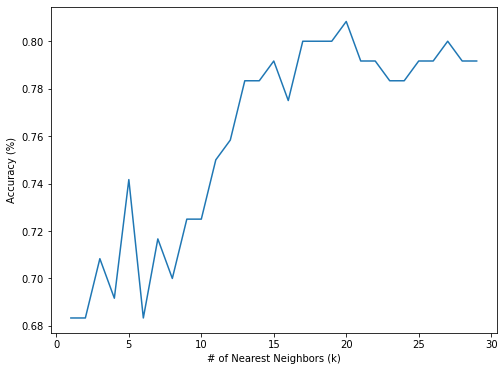

In [26]:
# Obtain accuracy score for k from 1 to 29
accuracies = []
for k in range(1,30):
    clf = KNN(k)
    clf.fit(X_train, y_train)
    y_hat_test = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_hat_test))
# Plot the results 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,30), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');

In [27]:
accuracies[19]

0.8083333333333333

From the graph above, we can see that the accuracy peaked (over 80%) when k is 20. That means the value of k-optimal is 20

## 1e. Evaluate Model using accuracy, precision, and recall

In [28]:
def evaluate_model(y_true, y_pred):
    matrix = np.zeros((2,2)) #Create matrix for the confusion matrix
    for i in range(len(y_true)):
        if y_pred[i] == 1 and y_true[i] == 1: 
            matrix[0,0] += 1 #Increment true positive
        elif y_pred[i] == 1 and y_true[i] == 0: 
            matrix[0,1] += 1 #Increment false positive
        elif y_pred[i] == 0 and y_true[i] == 0: 
            matrix[1,1] += 1 #Increment true negative
        elif y_pred[i] == 0 and y_true[i] == 1: 
            matrix[1,0] += 1 #Increment false negative
    #Set variable
    TP = matrix[0,0]
    FP = matrix[0,1]
    TN = matrix[1,1]
    FN = matrix[1,0]
    #Rebuild confusion matrix
    matrix = np.array([[TP,FP],[FN,TN]])
    #Calculate accuracy, precision, and recall using confusion matrix
    acc = (TP + TN) / (TP + TN + FP + FN)
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    #Display accuracy, precision, and recall
    print("Accuracy score: ")
    print(acc)
    print("Precision score: ")
    print(prec)
    print("Recall score: ")
    print(rec)
    return matrix #This function will return the matrix that will be used to build confusion matrix

In [29]:
#Build KNN model using k = 20 and evaluate the model
clf = KNN(20)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
conf_mtx = evaluate_model(y_test, prediction)

Accuracy score: 
0.8083333333333333
Precision score: 
0.8064516129032258
Recall score: 
0.5952380952380952


## 1f. Build confusion matrix

In [30]:
print(conf_mtx) #Confusion matrix after calling the evaluate_model() function

[[25.  6.]
 [17. 72.]]


Text(0.5, 1.0, 'Model Confusion Matrix')

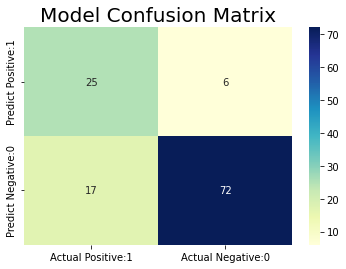

In [31]:
#Visualizing confusion matrix
cm_matrix_vis = pd.DataFrame(data=conf_mtx, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                     index=['Predict Positive:1', 'Predict Negative:0'])
g = sns.heatmap(cm_matrix_vis, annot=True, cmap='YlGnBu')
plt.title('Model Confusion Matrix', fontsize=20)